In [1]:
#Open Anaconda prompt and run "pip install netcdf4" to install

In [35]:
from pathlib import Path
import os
import xarray as xr
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
Path.cwd()

WindowsPath('C:/Users/Admin/Desktop/Python/Exercises/netcdf_files')

In [4]:
#Import netcdf datafile
data = xr.open_dataset('ERA5 2m_temp_reanalysis.nc', engine='netcdf4')

In [9]:
# View basic info about the dataset
print(data)

<xarray.Dataset>
Dimensions:     (valid_time: 744, latitude: 3, longitude: 3)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2025-01-01 ... 2025-01-31T23:00:00
  * latitude    (latitude) float64 -1.0 -1.25 -1.5
  * longitude   (longitude) float64 36.6 36.85 37.1
    expver      (valid_time) object ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-07T13:41 GRIB to CDM+CF via cfgrib-0.9.1...


In [11]:
# List variables
print(data.data_vars)

Data variables:
    t2m      (valid_time, latitude, longitude) float32 ...


In [13]:
# Access a specific variable
print(data['t2m'])

<xarray.DataArray 't2m' (valid_time: 744, latitude: 3, longitude: 3)>
[6696 values with dtype=float32]
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2025-01-01 ... 2025-01-31T23:00:00
  * latitude    (latitude) float64 -1.0 -1.25 -1.5
  * longitude   (longitude) float64 36.6 36.85 37.1
    expver      (valid_time) object ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      9
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

In [17]:
#Since the temperature data is in Kelvin, we can convert it to degree celsius as follow;
t2m_celsius = data.t2m - 273.15

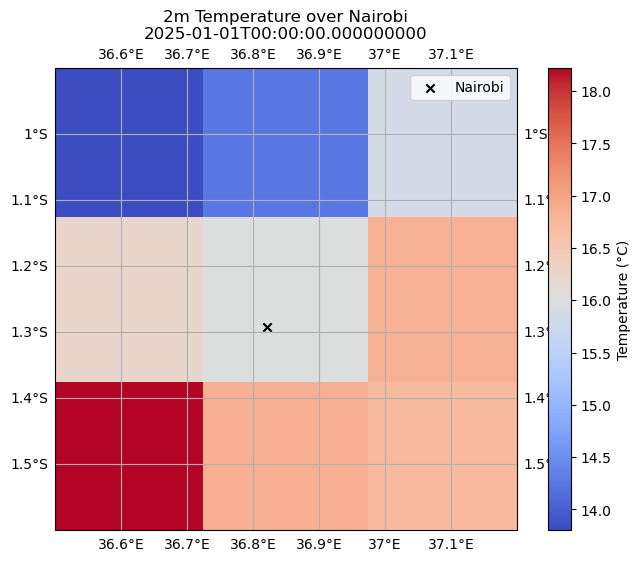

In [31]:
#Plot a single time step on a map of Nairobi

# Choose a time step to plot
step = 0
t2m_celsius = data.t2m - 273.15
temp_data = t2m_celsius.isel(valid_time=step)

# Set up plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([36.5, 37.2, -1.6, -0.9], crs=ccrs.PlateCarree())  # Nairobi region

# Add map features
ax.gridlines(draw_labels=True)

# Plot the temperature data
temp_plot = ax.pcolormesh(
    data.longitude, data.latitude, temp_data,
    cmap='coolwarm', shading='auto'
)
plt.colorbar(temp_plot, ax=ax, label='Temperature (°C)')
plt.title(f"2m Temperature over Nairobi\n{str(temp_data.valid_time.values)}")
plt.scatter(36.8219, -1.2921, color='black', marker='x', label='Nairobi')  # Nairobi CBD approx
plt.legend()
plt.show()

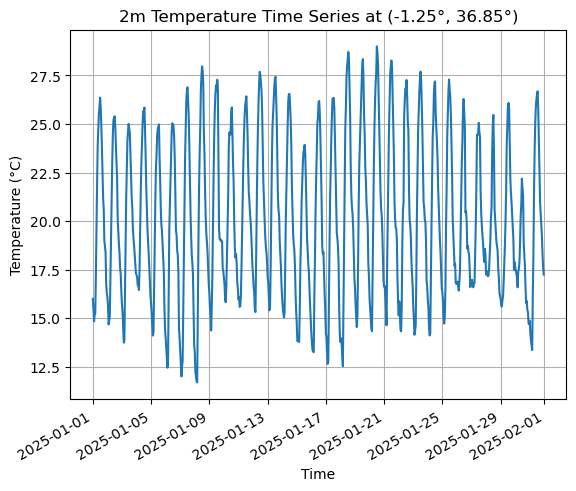

In [25]:
#We can also plot a timeseries at a point within the grid (say at latitude -1.25 and longitude 36.85)
time_series = data.t2m.sel(latitude=-1.25, longitude=36.85, method="nearest") - 273.15  # convert to °C
time_series.plot()
plt.title("2m Temperature Time Series at (-1.25°, 36.85°)")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.show()


In [39]:
#Convert to Dataframe

# Set target location
target_lat = -1.2
target_lon = 36.9

# Interpolate time series and convert from Kelvin to Celsius
time_series_interp = data.t2m.interp(latitude=target_lat, longitude=target_lon) - 273.15

# Convert to pandas DataFrame
df = time_series_interp.to_dataframe().reset_index()

# Show the first few rows
print(df.head())

           valid_time  number expver  latitude  longitude        t2m
0 2025-01-01 00:00:00       0   0001      -1.2       36.9  15.845835
1 2025-01-01 01:00:00       0   0001      -1.2       36.9  15.395093
2 2025-01-01 02:00:00       0   0001      -1.2       36.9  14.808203
3 2025-01-01 03:00:00       0   0001      -1.2       36.9  14.940977
4 2025-01-01 04:00:00       0   0001      -1.2       36.9  15.075981


In [43]:
#Export data to excel
df.to_excel("t2m_timeseries.xlsx", index=False)

#Open the folder where the files are stored and you should be able to see an excel file created with the filename 't2m_timeseries'